## Introduction

 In this unit, we delve into two crucial areas that form the bedrock of modern AI and Data Science. First, we will explore the concept of *Rational Intelligent Agents*, which provides a powerful framework for understanding and building AI systems. We'll examine what agents are, how they interact with their environments, the different types of environments they operate in, and the various structures and designs for intelligent agents. This part draws mainly from the principles outlined in @russell2016artificial.

Secondly, this unit will serve as your formal *Introduction to Data Science and foundational Statistics*. We will reinforce what Data Science entails and then dive into fundamental statistical concepts. Understanding statistics is non-negotiable for anyone serious about Data Science, as it provides the tools to summarize data, make inferences, and quantify uncertainty. We'll cover topics from sampling techniques and sample characteristics to descriptive statistics, including measures of central tendency, dispersion, and distribution shape.

By the end of this unit, you should be able to analyze AI systems from an agent perspective and apply basic statistical methods to describe and interpret datasets.

## Rational Intelligent Agents

The concept of an "agent" is central to understanding AI. It allows us to think about intelligent systems in a unified way.

###  What is an Agent?

An *agent* is anything that can be viewed as perceiving its environment through *sensors* and acting upon that environment through *actuators*.
Let's go through the key terms in this definition:

*   **Sensors:** These are the means by which an agent gathers information about its environment. For a human agent, sensors include eyes, ears, nose, skin, etc. For a robotic agent, sensors might include cameras, infrared finders, GPS, bump sensors, etc. For a software agent, sensors could be keyboard inputs, mouse clicks, network packets, or API calls that provide data.
*   **Actuators:** These are the means by which an agent performs actions in its environment. For a human, actuators include hands, legs, vocal cords, etc. For a robot, actuators might be motors controlling wheels or limbs, grippers, display screens, speakers, etc. For a software agent, actuators could be displaying information on a screen, writing to a file, sending network packets, or making API calls to perform an action.

The agent's *percept sequence* is the complete history of everything the agent has ever perceived. An agent's choice of action at any given instant can depend on the entire percept sequence observed so far.

### Agents and Environments (PEAS Framework)

To design an intelligent agent, we must specify its task environment. @russell2016artificial introduce the **PEAS** framework to do this:

*   **P**erformance Measure: How is the success of the agent defined? What criteria are used to evaluate its behavior? This should be an objective measure.
*   **E**nvironment: What is the context in which the agent operates? This includes everything external to the agent that it interacts with or that influences its choices.
*   **A**ctuators: What actions can the agent perform?
*   **S**ensors: What can the agent perceive from its environment?

 An illustration of these concepts is given in  @fig-agent.

:::{#fig-agent}
```{mermaid}
graph LR
    E(Environment) -->|Percepts| A(Agent);
    A -->|Actions| E;
    subgraph Agent
        S[Sensors] --> P(Processing);
        P --> AC[Actuators];
    end
    S -.-> E;
    AC -.-> E;

    style A fill:#b9f,stroke:#333,stroke-width:2px
    style E fill:#9f9,stroke:#333,stroke-width:2px
```
Agent and Environment.
:::

>**Example: A Self-Driving Car (Automated Taxi)**

*   **Performance Measure:** Safety (no accidents), speed (reaching destination quickly), legality (obeying traffic laws), passenger comfort, minimizing fuel consumption.
*   **Environment:** Roads, other vehicles (cars, trucks, bikes), pedestrians, traffic signals, weather conditions, road signs, lane markings.
*   **Actuators:** Steering wheel, accelerator, brake, signal lights, horn, display for passengers.
*   **Sensors:** Cameras (video), LiDAR, radar, GPS, speedometer, odometer, accelerometer, engine sensors, microphones.

Defining the PEAS for a task is often the first step in designing an agent.

### Rationality and Rational Agents

A **rational agent** is one that acts to achieve the **best expected outcome**, given its percept sequence and any built-in knowledge it has. "Best" is defined by the performance measure.


:::{.callout-caution}
### Important points about rationality:

*   **Rationality is not omniscience:** An omniscient agent knows the actual outcome of its actions and can act accordingly; but omniscience is impossible in reality. Rationality is about maximizing *expected* performance, given the information available from percepts. An action might turn out badly in hindsight, but still have been rational if it was the best choice given what was known at the time.
*   **Rationality depends on the PEAS:** An agent might be rational with respect to one performance measure but not another, or in one environment but not another.
*   **Information gathering is often a rational action:** If an agent doesn't know something important, a rational action might be to perform an exploratory action to gain more information (e.g., looking before crossing the street).
*   **Learning is essential for rationality in complex environments:** An agent that learns can improve its performance over time and adapt to unknown or changing environments.
:::

An ideal rational agent, for each possible percept sequence, does whatever action is expected to maximize its performance measure, on the basis of the evidence provided by the percept sequence and whatever built-in knowledge the agent has.


## The Nature of Environments

The characteristics of the task environment significantly influence the design of an intelligent agent.

![The nature of environments- mindmap](environments.png){#fig-environ}

 Russell and Norvig (2010) describe several dimensions along which environments can be classified:

1.  **Fully Observable vs. Partially Observable:**
    *   **Fully Observable:** If an agent's sensors give it access to the complete state of the environment at each point in time, then the environment is fully observable. The agent does not need to maintain much internal state to keep track of the world.
    *   **Partially Observable:** If the agent only has access to partial information about the state (e.g., due to noisy or inaccurate sensors, or parts of the state being hidden), it's partially observable. The agent may need to maintain an internal model of the world to estimate the current state.
    *   *Example:* A chess game with a visible board is fully observable. A poker game where opponents' cards are hidden is partially observable. A self-driving car operates in a partially observable environment (it can't see around corners or know other drivers' exact intentions).

2.  **Deterministic vs. Stochastic (or Non-deterministic):**
    *   **Deterministic:** If the next state of the environment is completely determined by the current state and the action executed by the agent, the environment is deterministic.
    *   **Stochastic:** If there is uncertainty about the next state even when the current state and agent's action are known, the environment is stochastic. This often implies probabilities associated with outcomes.
    *   **Non-deterministic:** If the outcomes are not determined by the current state and action, but are not described by probabilities (i.e., actions can have a set of possible outcomes, but no probabilities are assigned). From an agent design perspective, if an environment is non-deterministic, it is often treated as stochastic.
    *   *Example:* Chess is deterministic. A card game with shuffling is stochastic. A self-driving car is stochastic (e.g., tire blowouts, unpredictable actions of other drivers).

3.  **Episodic vs. Sequential:**
    *   **Episodic:** The agent's experience is divided into atomic "episodes." In each episode, the agent perceives and then performs a single action. The choice of action in one episode does not affect future episodes.
    *   **Sequential:** The current decision can affect all future decisions. The agent needs to think ahead.
    *   *Example:* An image classification task is often episodic (classifying one image doesn't directly affect the next). Chess and driving are sequential.

4.  **Static vs. Dynamic:**
    *   **Static:** The environment does not change while the agent is deliberating or deciding on an action.
    *   **Dynamic:** The environment can change while the agent is thinking. If the agent takes too long, the world changes, and its chosen action might no longer be appropriate.
    *   **Semidynamic:** The environment itself doesn't change with the passage of time, but the agent's performance score does.
    *   *Example:* A crossword puzzle is static. Chess played with a clock is semidynamic. Driving is dynamic.

5.  **Discrete vs. Continuous:**
    *   This refers to the nature of the environment's state, the way time is handled, and the agent's percepts and actions.
    *   **Discrete:** A finite or countably infinite number of distinct states, percepts, and actions.
    *   **Continuous:** States, time, percepts, or actions can take on values from a continuous range.
    *   *Example:* Chess is discrete. Driving involves continuous time, positions, speeds, etc.

6.  **Single-agent vs. Multi-agent:**
    *   **Single-agent:** Only one agent is operating in the environment.
    *   **Multi-agent:** Multiple agents are present. This introduces complexities like cooperation, competition, or communication.
        *   **Competitive Multi-agent:** Agents have conflicting goals (e.g., chess).
        *   **Cooperative Multi-agent:** Agents share common goals (e.g., a team of robots collaborating on a task).
    *   *Example:* Solving a crossword puzzle is single-agent. Chess is competitive multi-agent. A team of soccer-playing robots is cooperative multi-agent. Driving is multi-agent (usually competitive in some sense, but with elements of cooperation like following traffic laws).

Understanding these properties is crucial because the complexity of the agent design often depends heavily on the nature of its environment. The "real world" is typically partially observable, stochastic, sequential, dynamic, continuous, and multi-agent.


##  The Structure of Agents

An agent is implemented by an **agent program**, which is a function that maps percepts to actions. This program runs on some **computing device with physical sensors and actuators**, referred to as the **agent architecture**.

:::{.callout-note}

## Agent

`Agent = Architecture + Program`

:::

We can categorize agent programs into several types based on their complexity and capabilities.

###  Agent Programs and Agent Architecture

The function that implements the agent's mapping from percepts to actions is called an agent program. It takes the current percept as input and returns an action. The physical or computational platform on which the agent program runs is termed as the agent architecture. This includes the sensors that provide percepts and the actuators that execute actions.

###  Types of Agent Programs

@russell2016artificial (Chapter 2) describe a hierarchy of agent designs. A summary of this discussion is given here.

1.  **Simple Reflex Agents:**
    *   **How they work:** These agents select actions based *only* on the current percept, ignoring the rest of the percept history. They use condition-action rules (if-then rules).
    *   `If (condition) then action`
    *   **Internal State:** No memory of past percepts. They are stateless.
    *   **Limitations:** Can only work if the correct decision can be made based on the current percept alone. They get stuck in infinite loops easily if operating in partially observable environments.
    *   *Example:* A thermostat that turns on heat if the temperature is below a set point and turns it off if above. An automated vacuum cleaner that changes direction when its bump sensor is triggered.

2.  **Model-based Reflex Agents (or Agents with Internal State):**
    *   **How they work:** To handle partial observability, these agents maintain some internal state that depends on the percept history and reflects some of the unobserved aspects of the current state. This internal state is a "model" of the world.
    *   They need two kinds of knowledge:
        1.  How the world evolves independently of the agent.
        2.  How the agent's own actions affect the world.
    *   They update their internal state based on the current percept and their model of how the world works. Then, they choose an action based on this internal state, similar to a simple reflex agent.
    *   **Internal State:** Maintains a model of the current state of the world.
    *   *Example:* A self-driving car needs to keep track of where other cars *might* be even if it can't see them at the moment, based on its model of traffic flow.

3.  **Goal-based Agents:**
    *   **How they work:** Knowing the current state of the environment is not always enough to decide what to do. Sometimes the agent needs a **goal** – a description of desirable situations. These agents combine their model of the world with a goal to choose actions.
    *   They might involve search and planning to find a sequence of actions that achieves the goal. The decision process is fundamentally different from reflex agents; it considers the future.
    *   **Internal State:** Maintains a model of the world and information about its current goal(s).
    *   **Flexibility:** More flexible than reflex agents because the knowledge supporting their decisions is explicitly represented and can be modified. If the goal changes, the agent can adapt.
    *   *Example:* A delivery robot trying to reach a specific destination. A route-finding system in a GPS.

4.  **Utility-based Agents:**
    *   **How they work:** Goals alone are often not enough to generate high-quality behavior in many environments. There might be multiple ways to achieve a goal, some better (faster, safer, cheaper) than others. A **utility function** maps a state (or a sequence of states) onto a real number, which describes the associated degree of "happiness" or desirability.
    *   These agents choose actions that maximize their expected utility. If there are conflicting goals, or uncertainty in outcomes, a utility function provides a way to make rational trade-offs.
    *   **Internal State:** Maintains a model of the world and a utility function.
    *   **Rationality:** Provides a more general and complete basis for rational decision-making than goal-based agents.
    *   *Example:* A self-driving car making decisions that balance speed, safety, fuel efficiency, and passenger comfort, where each of these contributes to an overall utility. A trading agent deciding which stocks to buy or sell to maximize expected profit while managing risk.

5.  **Learning Agents:**
    *   **How they work:** Learning agents can improve their performance over time by modifying their internal components based on experience. A learning agent can be divided into four conceptual components:
        1.  **Learning Element:** Responsible for making improvements. It uses feedback from the "critic" on how the agent is doing and determines how the "performance element" should be modified to do better in the future.
        2.  **Performance Element:** Responsible for selecting external actions. It is what we previously considered to be the entire agent (e.g., a model-based, goal-based, or utility-based agent).
        3.  **Critic:** Tells the learning element how well the agent is doing with respect to a fixed performance standard. It provides feedback.
        4.  **Problem Generator:** Responsible for suggesting actions that will lead to new and informative experiences. This helps the agent explore its environment.
    *   **Adaptability:** Can operate in initially unknown environments and become more competent than their initial knowledge might allow.
    *   *Example:* A spam filter that learns to better classify emails based on user feedback. A game-playing AI that improves its strategy by playing many games.

These agent types represent increasing levels of generality and intelligence. Real-world AI systems often combine aspects of several of these types.

## Introduction to Data Science and Statistics

While Unit 1 introduced Data Science, this section reinforces its overview and transitions into the crucial role of statistics within it.

###  Overview of Data Science (Recap and Reinforcement)

As a reminder, *Data Science is an interdisciplinary field focused on extracting knowledge and insights from data*. It involves a blend of skills from computer science (programming, algorithms), statistics, and domain expertise. The goal is typically to understand past and present phenomena and to make predictions or informed decisions about the future. The Data Science pipeline often includes:

1.  **Problem Formulation/Question Asking:** Defining what you want to learn or predict.
2.  **Data Acquisition:** Gathering relevant data.
3.  **Data Cleaning and Preprocessing:** Handling missing values, errors, and transforming data into a usable format.
4.  **Exploratory Data Analysis (EDA):** Visualizing and summarizing data to understand its main characteristics and patterns.
5.  **Modeling:** Applying statistical or machine learning models to make predictions or inferences.
6.  **Evaluation:** Assessing the performance and validity of the model.
7.  **Communication/Deployment:** Presenting findings or deploying the model for use.

###  Why Statistics for Data Science?

Statistics is the science of collecting, analyzing, interpreting, presenting, and organizing data. It is absolutely fundamental to Data Science because:

*   **Describing Data:** Statistics provides methods (descriptive statistics) to summarize and describe the main features of a dataset (e.g., average values, spread of data).
*   **Making Inferences:** It allows us to make inferences or draw conclusions about a larger *population* based on a smaller *sample* of data (inferential statistics).
*   **Quantifying Uncertainty:** Statistical methods help us understand and quantify the uncertainty associated with our data, models, and conclusions.
*   **Designing Experiments:** It provides principles for designing effective data collection strategies and experiments to answer specific questions.
*   **Model Building and Validation:** Many machine learning models are built upon statistical principles, and statistics provides tools for evaluating model performance and significance.

Without a solid understanding of statistics, a data scientist risks misinterpreting data, drawing incorrect conclusions, and building flawed models.

###  Basic Statistical Concepts

Let's define some foundational statistical terms:

*   **Population:** The entire group of individuals, items, or data points that we are interested in studying.
    *   *Example:* All students enrolled at Amrita Vishwa Vidyapeetham; all transactions made by a company in a year; all stars in the Milky Way galaxy.
*   **Sample:** A subset of the population that is selected for analysis. We study samples because it's often impractical or impossible to study the entire population.
    *   *Example:* 500 randomly selected students from Amrita; 1000 randomly selected transactions from the past month; a sample of 100 stars observed by a telescope.
*   **Parameter:** A numerical characteristic of a *population* (e.g., the true average height of all Amrita students). Parameters are usually unknown and are what we often want to estimate.
*   **Statistic:** A numerical characteristic of a *sample* (e.g., the average height of the 500 sampled Amrita students). We use statistics to estimate population parameters.

#### Sampling Techniques (Brief Overview)

The way a sample is selected is crucial for its representativeness of the population. Some popular sampling techniques are given below.

*   **Simple Random Sampling:** Every member of the population has an equal chance of being selected, and every possible sample of a given size has an equal chance of being selected.
*   **Stratified Sampling:** The population is divided into mutually exclusive subgroups (strata) based on some characteristic (e.g., department, gender). Then, a simple random sample is taken from each stratum. This ensures representation from all subgroups.
*   **Cluster Sampling:** The population is divided into clusters (often geographically). A random sample of clusters is selected, and then *all* members within the selected clusters are included in the sample (or a sample is taken from within the selected clusters).

#### Sample Means and Sample Sizes

*   **Sample Mean (x̄):** The average of the data points in a sample. It is a statistic used to estimate the population mean (μ).
*   **Sample Size (n):** The number of observations in a sample. The size of the sample affects the reliability of the estimates. Generally, larger samples (if well-selected) provide more precise estimates of population parameters. Determining an appropriate sample size is an important consideration in statistical studies.

## Descriptive Statistics: Summarizing Data

Descriptive statistics are used to quantitatively describe or summarize the main features of a collection of information (a dataset).

###  Types of Data

Understanding the type of data you have is crucial for choosing appropriate descriptive statistics and visualizations.

*   **Categorical Data (Qualitative):** Represents characteristics or qualities.
    *   **Nominal Data:** Categories without a natural order or ranking (e.g., gender, color, city of birth).
    *   **Ordinal Data:** Categories with a meaningful order or ranking, but the differences between categories may not be equal or quantifiable (e.g., education level: High School, Bachelor's, Master's, PhD; satisfaction rating: Very Dissatisfied, Dissatisfied, Neutral, Satisfied, Very Satisfied).
*   **Numerical Data (Quantitative):** Represents measurable quantities.
    *   **Discrete Data:** Can only take on specific, distinct values (often integers), usually a result of counting (e.g., number of students in a class, number of cars passing a point).
    *   **Continuous Data:** Can take on any value within a given range, usually a result of measurement (e.g., height, weight, temperature, time).


###  Measures of Central Tendency: Finding the "Center" of Your Data

Measures of central tendency are cornerstone descriptive statistics that help us pinpoint the "center," "typical value," or the point around which data tends to cluster. Identifying this central point is often the initial step in exploring a dataset and gaining meaningful insights. The selection of an appropriate measure is not arbitrary; it depends significantly on the *nature of the data* being analyzed—whether it's categorical or numerical—and the *shape of its distribution*, particularly whether it's symmetric or skewed. For aspiring data analysts, it is paramount not merely to learn the calculation of these measures but to deeply understand their contextual relevance, their strengths, and their inherent limitations.

**The Mean (Arithmetic Average): The Balancing Point**

The most commonly known measure of central tendency is the *mean*, often referred to as the arithmetic average. Conceptually, if you were to plot all your data points on a number line, each with equal weight, the mean would represent the physical balancing point of that number line. It is calculated by summing all the values in a dataset and then dividing by the total count of those values. For an entire population, the mean is denoted by `μ` (mu) and calculated as $\mu=\dfrac{\sum X_i}{N}$, where `Xᵢ` is each population value and `N` is the population size. For a sample drawn from a population, the sample mean is denoted by `x̄` (x-bar) or sometimes `M`, and calculated as $\bar{x}=\dfrac{\sum x_i}{n}$, where `xᵢ` is each sample value and `n` is the sample size.

The mean is most appropriately used for *numerical data* (specifically, data measured on an interval or ratio scale) that exhibits a *symmetrical distribution*, such as the bell-shaped normal distribution. In such cases, the mean accurately reflects the center of the data. Furthermore, because it incorporates every data point in its calculation, it is a comprehensive measure and serves as a foundational element for many other important statistical calculations, including variance, standard deviation, and numerous inferential statistical tests.

However, a critical consideration for data analysts is the mean's high *sensitivity to outliers*, or extreme values. A single unusually large or small value can disproportionately influence the mean, pulling it towards the outlier and potentially misrepresenting the "typical" value of the dataset. Consider, for instance, a small dataset of salaries: [₹30,000, ₹35,000, ₹40,000, ₹45,000, ₹500,000]. The calculated mean salary is ₹130,000. This figure, heavily skewed by the ₹500,000 outlier, doesn't accurately represent the typical earnings within this group. It's also important to note that calculating a mean for nominal categorical data (e.g., "average color") is meaningless. While a mean *can* be computed for ordinal data if numerical codes are assigned, its interpretation must be approached with caution, as the intervals between ordinal categories are not necessarily uniform or quantitatively meaningful. `Python` implementation of this problem is here:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats # For mode

salaries = np.array([30000, 35000, 40000, 45000, 500000])

# Calculate Mean
mean_salary_manual = sum(salaries) / len(salaries)
mean_salary_numpy = np.mean(salaries)

print(f"Manually Calculated Mean Salary: ₹{mean_salary_manual:,.2f}")
print(f"NumPy Calculated Mean Salary: ₹{mean_salary_numpy:,.2f}")

Manually Calculated Mean Salary: ₹130,000.00
NumPy Calculated Mean Salary: ₹130,000.00


As seen, the mean salary is ₹130,000.00, heavily influenced by the outlier. The mean is best suited for numerical data that is symmetrically distributed. Its high sensitivity to outliers is a critical consideration.

**The Median: The Middle Ground**

When data is skewed or contains significant outliers, the *median* often provides a more robust and representative measure of central tendency. The median is defined as the middle value in a dataset that has been arranged in ascending or descending order. It effectively divides the dataset into two equal halves, with 50% of the data points falling below it and 50% above.

To calculate the median, the first step is always to sort the data. If the dataset contains an odd number of observations (`n`), the median is simply the value at the `(n+1)/2` position in the sorted list. If `n` is even, the median is the average of the two middle values, specifically the values at the `n/2` position and the `(n/2)+1` position. `Python` code to calculate median of the previous example is given below.

In [2]:
# Calculate Median for the salaries
median_salary_numpy = np.median(salaries)
print(f"NumPy Calculated Median Salary: ₹{median_salary_numpy:,.2f}")

NumPy Calculated Median Salary: ₹40,000.00


The primary strength of the median lies in its *robustness to outliers*. Unlike the mean, extreme values have little to no impact on the median. Revisiting our salary example [₹30,000, ₹35,000, ₹40,000, ₹45,000, ₹500,000], the median salary is ₹40,000. This value is clearly a more accurate reflection of the typical salary in this dataset than the mean of ₹130,000. This makes the median an ideal choice for skewed numerical datasets. It is also a suitable measure for ordinal data, allowing us, for instance, to find a median satisfaction rating. However, one should be aware that the median does not utilize all the data values in its calculation—it primarily depends on the value(s) in the middle. While this contributes to its robustness, it also means that it is sometimes less mathematically tractable for certain advanced statistical procedures where the properties of the mean are preferred. The interpretation of the median is straightforward: "Half the data points are below this value, and half are above."

**The Mode: The Most Frequent**

The *mode* offers a different perspective on central tendency by identifying the value or category that appears most frequently within a dataset. To find the mode, one simply counts the occurrences of each unique value or category; the one with the highest frequency is designated as the mode. A dataset might present with **no mode** if all values occur with equal frequency. It can be *unimodal* (having one mode), *bimodal* (having two modes, if two distinct values share the highest frequency), or even *multimodal* (having more than two modes).

A significant advantage of the mode is that it is the *only* measure of central tendency appropriate for *nominal categorical data*. For example, in a dataset of car sales, the mode would tell us the most commonly sold car color. The mode can also be applied to ordinal and numerical data (both discrete and continuous, though for continuous data, values are often grouped into intervals or bins first to determine a modal class). Like the median, the mode is *not affected by outliers*. However, it's important to recognize that the mode may not always be unique, or in some datasets, it might not exist at all, which can limit its utility as a sole summary statistic. In distributions that are heavily skewed, the mode might be located at one end and may not be a good indicator of the overall central location of the data. Nevertheless, in multimodal distributions, the modes are valuable for highlighting multiple points of concentration or peaks within the data.

A `Python` example to find the mode of a data is given below:

In [3]:
# Example for Mode
data_for_mode = [1, 2, 2, 3, 3, 3, 4, 5, 5]
mode_scipy = stats.mode(data_for_mode, keepdims=False) # keepdims=False for cleaner output in newer SciPy

print(f"Data for mode: {data_for_mode}")
print(f"Mode (SciPy): {mode_scipy.mode}, Count: {mode_scipy.count}")

Data for mode: [1, 2, 2, 3, 3, 3, 4, 5, 5]
Mode (SciPy): 3, Count: 3


In [4]:
# For multiple modes or categorical data, Pandas is often easier
categorical_data = pd.Series(['apple', 'banana', 'apple', 'orange', 'banana', 'apple'])
mode_pandas_categorical = categorical_data.mode()
print(f"\nCategorical Data: {list(categorical_data)}")
print(f"Mode(s) (Pandas):\n{mode_pandas_categorical}")


Categorical Data: ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
Mode(s) (Pandas):
0    apple
dtype: object


:::{.callout-important}

### Choosing the Right Measure: A Data Analyst's Perspective

As a data analyst, selecting a single measure of central tendency in isolation is rarely sufficient. A more insightful approach involves considering these measures collectively to build a comprehensive understanding of the data's central location and distribution.

When dealing with a *symmetrically distributed* dataset, such as data that approximates a normal (bell-shaped) curve, the mean, median, and mode will typically be very close to each other, often nearly identical. In such scenarios, the mean is often the preferred measure due to its desirable mathematical properties that facilitate further statistical analysis.

However, the situation changes with *skewed distributions*. In a *positively skewed* (or right-skewed) distribution, where the tail extends towards the higher values, the presence of high-value outliers tends to pull the mean upwards. Consequently, the relationship is generally `Mean > Median > Mode`. Here, the median is usually a more faithful representative of the central tendency than the mean. Conversely, in a *negatively skewed* (or left-skewed) distribution, where the tail extends towards lower values, low-value outliers pull the mean downwards, resulting in a typical relationship of `Mean < Median < Mode`. Again, the median often provides a more reliable indication of the center.

For *categorical data*, the choices are more constrained. For nominal data, only the mode is meaningful. For ordinal data, both the median and the mode are appropriate and can provide useful insights. While a mean can be calculated for ordinal data if numerical codes are assigned, its interpretation requires careful consideration of whether the intervals between categories are truly equal and meaningful.

The presence of *outliers* is a critical flag for any data analyst. If outliers are suspected in numerical data, it is always advisable to calculate both the mean and the median. A substantial difference between these two values is a strong indicator of either a skewed distribution or the significant influence of extreme values. Such observations warrant further investigation into the nature and cause of these outliers.

:::

Consider a practical scenario in e-commerce data analytics. Suppose an analysis of customer purchase amounts reveals a *mean* purchase amount of $150, a *median* purchase amount of $60, and a *modal* purchase amount (when grouped into $10 bins) in the $40-$50 range. This combination of measures tells a story: the distribution of purchase amounts is likely *positively skewed*. The mean ($150) being considerably higher than the median ($60) suggests that a subset of customers is making very large purchases, thereby inflating the average. The *median ($60)* offers a better representation of what a "typical" customer spends – half of the customers spend less than $60, and half spend more. The *mode ($40-$50)* highlights the most frequent range of purchase amounts. An analyst would communicate these findings by emphasizing the median as the typical expenditure while also noting the higher mean, which underscores the importance of high-value customers. This would naturally lead to further investigation into the characteristics and behaviors of these high-spending customers. A histogram of the purchase data would visually confirm the observed skewness. We will discuss the concept of skewness more detail in the coming sections.

###  Measures of Dispersion (Variability): Quantifying the Spread of Data

While measures of central tendency provide a snapshot of the "typical" value in a dataset, they do not tell the whole story. Two datasets can have the same mean or median yet look vastly different in terms of how their data points are scattered. *Measures of dispersion*, also known as measures of variability or spread, quantify the extent to which data points in a dataset deviate from the central tendency or from each other. Understanding dispersion is crucial for assessing the consistency, reliability, and distribution pattern of data.

1. **The Range:**- A Simplistic View of Spread

The *range* is the simplest measure of dispersion, calculated merely as the difference between the maximum and minimum values in a dataset: `Range = Maximum Value - Minimum Value`. While straightforward to compute, its utility is limited because it only considers the two most extreme data points. Consequently, the range is highly *sensitive to outliers*. A single unusually high or low value can dramatically inflate the range, providing a potentially misleading picture of the overall variability of the majority of the data. For instance, in our salary example [₹30k, ₹35k, ₹40k, ₹45k, ₹500k], the range is ₹470k, largely driven by the single outlier. If the outlier were absent, the range would be much smaller (₹15k). Thus, while the range gives a quick sense of the total span of the data, it is generally not a robust measure of dispersion. A `Python` example is given below:

In [5]:
# Range for salaries
range_salaries = np.ptp(salaries) # ptp stands for "peak to peak"
# Alternatively: np.max(salaries) - np.min(salaries)
print(f"Salaries: {salaries}")
print(f"Range of Salaries: ₹{range_salaries:,.2f}")

Salaries: [ 30000  35000  40000  45000 500000]
Range of Salaries: ₹470,000.00


The range for our salary example is ₹470,000.00, largely driven by the outlier. It's simple but highly sensitive to outliers.

2. **Variance:**- The Average Squared Deviation

A more sophisticated and widely used measure of dispersion is *variance*. Variance quantifies the average of the squared differences of each data point from the mean of the dataset. Squaring the differences serves two purposes: it prevents negative and positive deviations from canceling each other out, and it emphasizes larger deviations more heavily.

For an entire population, the variance (`σ²`, sigma-squared) is calculated as: $\sigma^2=\dfrac{\sum(X_i-\mu)^2}{N}$, where `Xᵢ` is each population value, `μ` is the population mean, and `N` is the population size.

When calculating variance from a sample to estimate the population variance, a slight modification is used for the sample variance (`s²`): $s^2=\dfrac{\sum(x_i-\bar{x})^2}{n-1}$. Here, `xᵢ` is each sample value, `x̄` is the sample mean, and `n` is the sample size. The use of `(n - 1)` in the denominator, known as Bessel's correction, provides an unbiased estimate of the population variance from the sample data. A `python` example to find variance of a data is given below:

In [6]:
# Variance for salaries (sample variance, ddof=1 by default in NumPy)
variance_salaries_numpy = np.var(salaries, ddof=1) # ddof=1 for sample variance
print(f"Sample Variance of Salaries (NumPy, ddof=1): {variance_salaries_numpy:,.2f}")

Sample Variance of Salaries (NumPy, ddof=1): 42,812,500,000.00


The units of variance are squared (e.g., (Rupees)²), making direct interpretation difficult.

:::{.callout-note}
## Interpretability issue of variance

The primary challenge with interpreting variance directly is that its units are the square of the original data units (e.g., if data is in meters, variance is in meters squared). This can make it less intuitive to relate back to the original scale of measurement. However, variance is a critical component in many statistical formulas and models.
:::

3. **Standard Deviation:**- An Interpretable Measure of Spread

To overcome the unit interpretation issue of variance, we use the *standard deviation*. The standard deviation is simply the square root of the variance. It measures the typical or average amount by which data points deviate from the mean.
The population standard deviation (`σ`, sigma) is `σ = √σ²`, and the sample standard deviation (`s`) is `s = √s²`.

A simple `Python` example is here:

In [7]:
# Standard Deviation for salaries (sample standard deviation)
std_dev_salaries_numpy = np.std(salaries, ddof=1) # ddof=1 for sample std
print(f"Sample Standard Deviation of Salaries (NumPy, ddof=1): ₹{std_dev_salaries_numpy:,.2f}")

Sample Standard Deviation of Salaries (NumPy, ddof=1): ₹206,911.82


A small standard deviation means data points are close to the mean; a large one means they are spread out.


:::{.callout-important}

### Standard deviation over variance in statistical calculations

The standard deviation is expressed in the *same units as the original data*, making it much more interpretable. A small standard deviation indicates that the data points tend to be clustered closely around the mean, signifying low variability. Conversely, a large standard deviation suggests that the data points are spread out over a wider range of values, indicating high variability. For data that follows a normal distribution, the standard deviation has particularly useful properties (e.g., approximately 68% of data falls within one standard deviation of the mean, 95% within two, and 99.7% within three – the empirical rule).

:::
4. **Interquartile Range (IQR):**- A Robust Measure of Middle Spread

Similar to how the median is a robust measure of central tendency, the *Interquartile Range (IQR)* is a robust measure of dispersion, meaning it is less affected by outliers. The IQR describes the spread of the middle 50% of the data. To understand IQR, we first need to understand quartiles.

**Quartiles** divide a sorted dataset into four equal parts, each containing 25% of the observations:

*   *Q1 (First Quartile or 25th Percentile):* The value below which 25% of the data falls.

*   *Q2 (Second Quartile or 50th Percentile):* This is simply the Median of the dataset.

*   *Q3 (Third Quartile or 75th Percentile):* The value below which 75% of the data falls.


The *Interquartile Range* is then calculated as the difference between the third and first quartiles: `IQR = Q3 - Q1`.

Because the IQR focuses on the central portion of the data distribution, it is not influenced by extreme values in the tails. This makes it a particularly useful measure of spread for skewed distributions or datasets known to contain outliers. The IQR is also instrumental in constructing box plots and in a common rule of thumb for identifying potential outliers: data points falling below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR` are often flagged for further investigation.

As a data analyst, you would choose measures of dispersion based on the data's characteristics and your analytical goals. If your data is symmetric and free of significant outliers, the standard deviation provides a comprehensive measure. If the data is skewed or outliers are a concern, the IQR offers a more robust alternative for understanding the spread of the bulk of your data. Following `Python` code demonstrate the IQR calculation of the previously discussed salary data.

In [8]:
# IQR for salaries
q1_salaries = np.percentile(salaries, 25)
q3_salaries = np.percentile(salaries, 75)
iqr_salaries = q3_salaries - q1_salaries
# Alternatively, using scipy.stats
iqr_scipy_salaries = stats.iqr(salaries)

print(f"Q1 Salary: ₹{q1_salaries:,.2f}")
print(f"Q3 Salary: ₹{q3_salaries:,.2f}")
print(f"IQR of Salaries (Manual Percentile): ₹{iqr_salaries:,.2f}")
print(f"IQR of Salaries (SciPy): ₹{iqr_scipy_salaries:,.2f}")

Q1 Salary: ₹35,000.00
Q3 Salary: ₹45,000.00
IQR of Salaries (Manual Percentile): ₹10,000.00
IQR of Salaries (SciPy): ₹10,000.00


### Covariance: Measuring Joint Variability

Thus far, we have focused on describing single variables (univariate analysis). However, data analysts are often interested in understanding the relationships *between* two or more variables (bivariate or multivariate analysis). *Covariance* is a statistical measure that describes the direction of the linear relationship between two numerical variables. It quantifies how two variables change together.

If two variables tend to increase or decrease together, their covariance will be positive. For example, we might expect a positive covariance between study hours and exam scores. If one variable tends to increase while the other decreases, their covariance will be negative. For instance, the covariance between temperature and sales of hot chocolate might be negative. If there is no discernible linear tendency for the variables to move together, their covariance will be close to zero.

The sample covariance between two variables, X and Y, is calculated as: $Cov(X,Y)=\dfrac{\sum (x_i-\bar{x})(y_i-\bar{y})}{n-1}$ , where `xᵢ` and `yᵢ` are individual paired observations, `x̄` and `ȳ` are their respective sample means, and `n` is the number of pairs. Each term $(x_i-\bar{x})(y_i-\bar{y})$ will be positive if both `xᵢ` and `yᵢ` are above their means or both are below their means. It will be negative if one is above its mean and the other is below. Summing these products gives an overall sense of the joint deviation.

While covariance indicates the direction of the relationship, a significant limitation is that its *magnitude is not standardized* and depends on the units of measurement of the variables. For example, the covariance between height (in cm) and weight (in kg) will be different from the covariance between height (in meters) and weight (in pounds), even if the underlying relationship is the same. This makes it difficult to compare the strength of relationships across different pairs of variables using covariance alone. To address this, a standardized version called the correlation coefficient (which we will discuss later) is often preferred for assessing the strength and direction of a linear relationship.

As a simple example, consider the context of study hours and exam score for 5 students given below. Examine whether there exist a positive correlation between the number of hours studied and exam score.
```python
study_hours = np.array([2, 3, 5, 1, 4])
exam_scores = np.array([65, 70, 85, 60, 75])
```

`Python` code to solve this problem is given below:

In [9]:
import numpy as np
study_hours = np.array([2, 3, 5, 1, 4])
exam_scores = np.array([65, 70, 85, 60, 75])

# Covariance matrix
# The diagonal elements are variances of each variable.
# Off-diagonal elements are covariances between pairs of variables.
covariance_matrix = np.cov(study_hours, exam_scores) # Rowvar=True by default
# covariance_matrix[0, 1] is Cov(study_hours, exam_scores)

print("Study Hours:", study_hours)
print("Exam Scores:", exam_scores)
print("\nCovariance Matrix:")
print(covariance_matrix)
print(f"\nCov(Study Hours, Exam Scores): {covariance_matrix[0, 1]:.2f}")

Study Hours: [2 3 5 1 4]
Exam Scores: [65 70 85 60 75]

Covariance Matrix:
[[ 2.5 15. ]
 [15.  92.5]]

Cov(Study Hours, Exam Scores): 15.00


A positive covariance (like 15.00 here) suggests that as study hours increase, exam scores tend to increase. However, the magnitude is not standardized and depends on the units.

###  Skewness and Kurtosis: Describing the Shape of a Distribution

Beyond central tendency and dispersion, the overall **shape** of a data distribution provides valuable insights. Two important measures that describe shape are skewness and kurtosis.

**Skewness: Measuring Asymmetry**

*Skewness* is a measure of the asymmetry of a probability distribution of a real-valued random variable around its mean. In simpler terms, it tells us if the distribution is lopsided or symmetric.
*   A distribution with *zero skewness* (or a skewness value very close to zero) is perfectly symmetric. For such distributions, like the normal distribution, the mean, median, and mode are typically equal or very close.
*   A *positively skewed* (or right-skewed) distribution has a longer or fatter tail on its right side. This indicates that there are some unusually high values pulling the mean to the right. In such distributions, the general relationship is `Mean > Median > Mode`.
*   A *negatively skewed* (or left-skewed) distribution has a longer or fatter tail on its left side, indicating the presence of unusually low values pulling the mean to the left. Here, the typical relationship is `Mean < Median < Mode`.

:::{#fig-skewness}
```{mermaid}
graph TD
  A["Symmetric (Skewness ≈ 0)"] --> B["Normal Curve"]
  C["Positive Skew (Right Skew)"] --> D["Curve Skewed Right"]
  E["Negative Skew (Left Skew)"] --> F["Curve Skewed Left"]
```

Skewness and Normal curve
:::

Understanding skewness is crucial for data analysts because it affects the choice of appropriate statistical models and tests. Many statistical techniques assume a symmetric (often normal) distribution, and significant skewness might require data transformations or the use of non-parametric methods.

**Kurtosis: Measuring "Tailedness" and "Peakedness"**

*Kurtosis* measures the "tailedness" or "peakedness" of a probability distribution relative to a normal distribution. It describes the concentration of data in the tails and around the peak.
The kurtosis of a standard normal distribution is 3. Often, "excess kurtosis" is reported, which is `Kurtosis - 3`.
*   *Leptokurtic distributions (positive excess kurtosis, > 0):* These distributions have a sharper peak and heavier (fatter) tails than a normal distribution. This implies that extreme values (outliers) are more likely to occur compared to a normal distribution. More of the variance is due to these infrequent extreme deviations.
*   *Mesokurtic distributions (excess kurtosis ≈ 0):* These have a similar degree of peakedness and tailedness as a normal distribution.
*   *Platykurtic distributions (negative excess kurtosis, < 0):* These distributions are flatter and have thinner tails than a normal distribution. Extreme values are less likely. The variance is more due to frequent, modestly sized deviations.

Kurtosis helps analysts understand the risk of outliers in a dataset. A high kurtosis suggests that the data has a higher propensity for producing extreme values, which can be critical in fields like finance (risk management) or quality control. `Python` code to find the skewness and kurtosis of the previous salary data is here:

In [10]:
# Skewness and Kurtosis for salaries
# Note: SciPy's kurtosis calculates "excess kurtosis" by default (fisher=True)
skewness_salaries = stats.skew(salaries)
kurtosis_salaries = stats.kurtosis(salaries, fisher=True) # Fisher=True for excess kurtosis

print(f"Salaries Data: {salaries}")
print(f"Skewness of Salaries: {skewness_salaries:.2f}")
print(f"Excess Kurtosis of Salaries: {kurtosis_salaries:.2f}")

Salaries Data: [ 30000  35000  40000  45000 500000]
Skewness of Salaries: 1.50
Excess Kurtosis of Salaries: 0.25


Another demonstration of skewness and kurtosis of a symmetric data is given below.

In [11]:
# Example of a more symmetric dataset
symmetric_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 5, 6, 7, 5, 6])
skewness_symmetric = stats.skew(symmetric_data)
kurtosis_symmetric = stats.kurtosis(symmetric_data)
print(f"\nSymmetric Data Example: {symmetric_data}")
print(f"Skewness of Symmetric Data: {skewness_symmetric:.2f}")
print(f"Excess Kurtosis of Symmetric Data: {kurtosis_symmetric:.2f}")


Symmetric Data Example: [ 1  2  3  4  5  6  7  8  9 10  4  5  6  7  5  6]
Skewness of Symmetric Data: 0.00
Excess Kurtosis of Symmetric Data: -0.48


### Visualizing distribution key points using a Box plot

A concise and effective way to summarize the distribution of numerical data is through the **five-point summary**. This summary consists of five key statistical values:

1.  *Minimum:* The smallest value in the dataset.
2.  *First Quartile (Q1):* The 25th percentile.
3.  *Median (Q2):* The 50th percentile.
4.  *Third Quartile (Q3):* The 75th percentile.
5.  *Maximum:* The largest value in the dataset.

This summary provides a quick understanding of the range, central tendency (median), and spread of the inner 50% of the data (IQR = Q3 - Q1).

The *Box Plot* (also known as a box-and-whisker plot) is a standardized graphical representation of the five-point summary, offering a powerful visual tool for data analysis.
A typical box plot displays:

*   A rectangular *"box"* that extends from the first quartile (Q1) to the third quartile (Q3). The length of this box represents the Interquartile Range (IQR).
*   A *line inside the box* that marks the median (Q2).
*   *"Whiskers"* that extend from the ends of the box. The traditional method for drawing whiskers is to extend them to the minimum and maximum data values *within* a range of 1.5 times the IQR from the quartiles (i.e., from Q1 - 1.5*IQR to Q3 + 1.5*IQR).
*   Data points that fall *outside these whiskers* are often plotted individually as dots or asterisks and are considered potential *outliers*.

Box plots are exceptionally useful for several reasons:

*   They clearly show the *median, IQR, and overall range* of the data.
*   They provide a visual indication of the data's *symmetry or skewness*. If the median is not centered in the box, or if one whisker is much longer than the other, it suggests skewness.
*   They are very effective for *identifying potential outliers*.
*   They allow for easy *comparison of distributions across multiple groups* when plotted side-by-side.

The five point summary of the previous salary data is visualized with a box-plot in `Python` code.

Five-Point Summary for Salaries:
  Minimum: ₹30,000.00
  Q1 (25th Percentile): ₹35,000.00
  Median (50th Percentile): ₹40,000.00
  Q3 (75th Percentile): ₹45,000.00
  Maximum: ₹500,000.00

Pandas describe() output for Salaries:
count          ₹5.00
mean     ₹130,000.00
std      ₹206,911.82
min       ₹30,000.00
25%       ₹35,000.00
50%       ₹40,000.00
75%       ₹45,000.00
max      ₹500,000.00
dtype: object


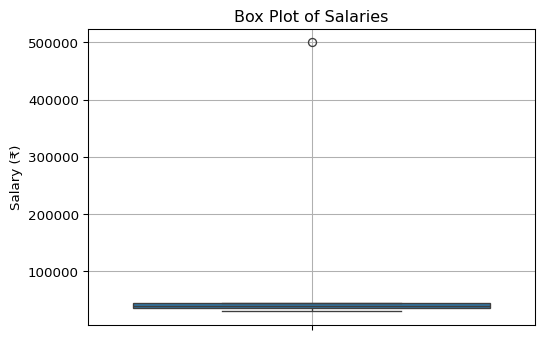

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Five-point summary for salaries using NumPy percentiles
min_sal = np.min(salaries)
q1_sal = np.percentile(salaries, 25)
median_sal = np.median(salaries)
q3_sal = np.percentile(salaries, 75)
max_sal = np.max(salaries)

print("Five-Point Summary for Salaries:")
print(f"  Minimum: ₹{min_sal:,.2f}")
print(f"  Q1 (25th Percentile): ₹{q1_sal:,.2f}")
print(f"  Median (50th Percentile): ₹{median_sal:,.2f}")
print(f"  Q3 (75th Percentile): ₹{q3_sal:,.2f}")
print(f"  Maximum: ₹{max_sal:,.2f}")

# Pandas describe() also gives a similar summary
salaries_series = pd.Series(salaries)
print("\nPandas describe() output for Salaries:")
print(salaries_series.describe().apply(lambda x: f"₹{x:,.2f}"))


# Box Plot for salaries
plt.figure(figsize=(6, 4))
sns.boxplot(y=salaries_series) # Using y for vertical boxplot with a Pandas Series
plt.title('Box Plot of Salaries')
plt.ylabel('Salary (₹)')
plt.grid(True)
plt.show()

By utilizing these descriptive statistics—measures of central tendency, dispersion, shape, and their visual representations like box plots—data analysts can thoroughly explore and understand the fundamental characteristics of their datasets, laying a solid foundation for more advanced inferential analysis and modeling.

## Problems and Python solutions in descriptive statistics

1. Given the following dataset representing the scores of 10 students on a test:
scores = [78, 85, 92, 65, 72, 88, 90, 78, 85, 80]
Calculate and interpret the following for this dataset:
a) Mean, Median, Mode
b) Range, Variance, Standard Deviation, IQR
c) Skewness and Kurtosis
d) Generate a five-point summary and a box plot.

Dataset: Student Scores
[78 85 92 65 72 88 90 78 85 80]

a) Central Tendency:
  Mean: 81.30
  Median: 82.50
  Mode: 78

b) Dispersion:
  Range: 27.00
  Variance (sample): 70.90
  Standard Deviation (sample): 8.42
  Q1: 78.00
  Q3: 87.25
  IQR: 9.25

c) Shape:
  Skewness: -0.57
  Excess Kurtosis: -0.56

d) Five-Point Summary (using Pandas describe()):
Minimum    65.00
Q1         78.00
Median     82.50
Q3         87.25
Maximum    92.00
dtype: float64


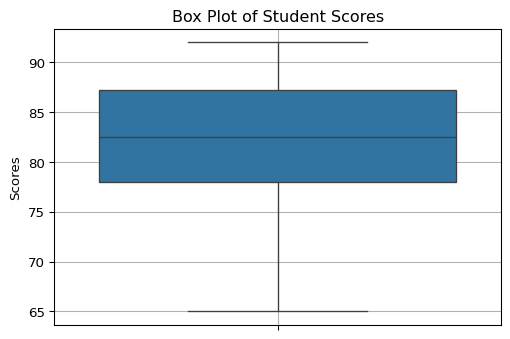

In [13]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

scores = np.array([78, 85, 92, 65, 72, 88, 90, 78, 85, 80])
scores_series = pd.Series(scores) # Using Pandas Series for convenience with mode and describe

print("Dataset: Student Scores")
print(scores)

# a) Mean, Median, Mode
mean_scores = np.mean(scores)
median_scores = np.median(scores)
mode_scores = stats.mode(scores, keepdims=False).mode # Using SciPy stats for mode of NumPy array
# For multiple modes or more robust mode finding with Pandas:
# mode_scores_pd = scores_series.mode()

print(f"\na) Central Tendency:")
print(f"  Mean: {mean_scores:.2f}")
print(f"  Median: {median_scores:.2f}")
print(f"  Mode: {mode_scores}") # If multiple modes, SciPy returns the smallest
# print(f"  Mode (Pandas): {list(mode_scores_pd)}")


# b) Range, Variance, Standard Deviation, IQR
range_scores = np.ptp(scores)
variance_scores = np.var(scores, ddof=1) # Sample variance
std_dev_scores = np.std(scores, ddof=1) # Sample standard deviation
q1_scores = np.percentile(scores, 25)
q3_scores = np.percentile(scores, 75)
iqr_scores = q3_scores - q1_scores
# iqr_scores_scipy = stats.iqr(scores)


print(f"\nb) Dispersion:")
print(f"  Range: {range_scores:.2f}")
print(f"  Variance (sample): {variance_scores:.2f}")
print(f"  Standard Deviation (sample): {std_dev_scores:.2f}")
print(f"  Q1: {q1_scores:.2f}")
print(f"  Q3: {q3_scores:.2f}")
print(f"  IQR: {iqr_scores:.2f}")

# c) Skewness and Kurtosis
skewness_scores = stats.skew(scores)
kurtosis_scores = stats.kurtosis(scores, fisher=True) # Excess kurtosis

print(f"\nc) Shape:")
print(f"  Skewness: {skewness_scores:.2f}")
print(f"  Excess Kurtosis: {kurtosis_scores:.2f}")

# d) Five-point summary and Box plot
print(f"\nd) Five-Point Summary (using Pandas describe()):")
# Using .loc to select specific stats from describe() and format them
summary_stats = scores_series.describe().loc[['min', '25%', '50%', '75%', 'max']]
print(summary_stats.rename(index={'min': 'Minimum', '25%': 'Q1', '50%': 'Median', '75%': 'Q3', 'max': 'Maximum'}))


plt.figure(figsize=(6,4))
sns.boxplot(data=scores_series) # Can directly pass Pandas Series
plt.title('Box Plot of Student Scores')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

2. Two brands of light bulbs, Brand A and Brand B, were tested for their lifespan in hours. The results are:
brand_A_lifespan = [1200, 1250, 1300, 1100, 1150, 1220, 1280, 1180]
brand_B_lifespan = [1000, 1500, 1100, 1400, 1050, 1450, 900, 1600]
a) Calculate the mean and median lifespan for each brand.
b) Calculate the standard deviation for each brand.
c) Which brand appears more consistent in its lifespan based on these statistics?
d) Generate side-by-side box plots to visually compare their distributions.

Brand A Lifespan (hours): [1200 1250 1300 1100 1150 1220 1280 1180]
Brand B Lifespan (hours): [1000 1500 1100 1400 1050 1450  900 1600]

a) Central Tendency:
  Brand A - Mean: 1210.00, Median: 1210.00
  Brand B - Mean: 1250.00, Median: 1250.00

b) Dispersion (Standard Deviation):
  Brand A - Std Dev: 66.98
  Brand B - Std Dev: 265.92

c) Consistency:
  Brand A appears more consistent in its lifespan.


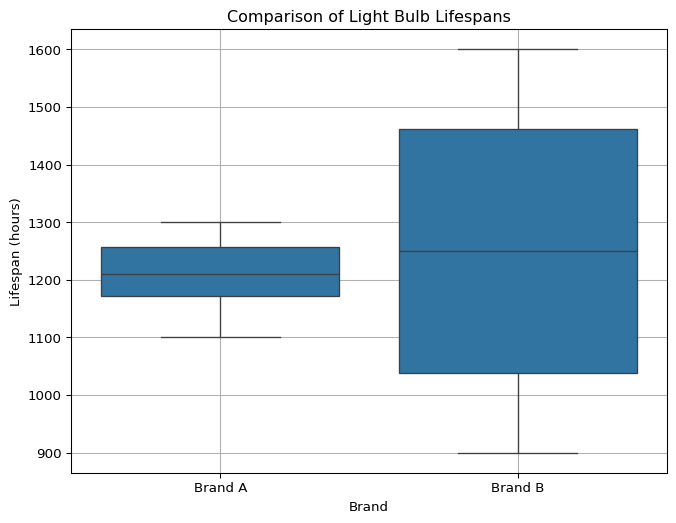

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

brand_A_lifespan = np.array([1200, 1250, 1300, 1100, 1150, 1220, 1280, 1180])
brand_B_lifespan = np.array([1000, 1500, 1100, 1400, 1050, 1450, 900, 1600])

# a) Mean and Median
mean_A = np.mean(brand_A_lifespan)
median_A = np.median(brand_A_lifespan)
mean_B = np.mean(brand_B_lifespan)
median_B = np.median(brand_B_lifespan)

print("Brand A Lifespan (hours):", brand_A_lifespan)
print("Brand B Lifespan (hours):", brand_B_lifespan)

print(f"\na) Central Tendency:")
print(f"  Brand A - Mean: {mean_A:.2f}, Median: {median_A:.2f}")
print(f"  Brand B - Mean: {mean_B:.2f}, Median: {median_B:.2f}")

# b) Standard Deviation
std_A = np.std(brand_A_lifespan, ddof=1)
std_B = np.std(brand_B_lifespan, ddof=1)

print(f"\nb) Dispersion (Standard Deviation):")
print(f"  Brand A - Std Dev: {std_A:.2f}")
print(f"  Brand B - Std Dev: {std_B:.2f}")

# c) Consistency
# Lower standard deviation implies more consistency
consistency_statement = "Brand A" if std_A < std_B else "Brand B"
if std_A == std_B: consistency_statement = "Both brands have similar consistency"

print(f"\nc) Consistency:")
print(f"  {consistency_statement} appears more consistent in its lifespan.")

# d) Side-by-side Box Plots
# To use Seaborn for side-by-side plots, it's easier if data is in a "long" format DataFrame
df_A = pd.DataFrame({'Lifespan': brand_A_lifespan, 'Brand': 'Brand A'})
df_B = pd.DataFrame({'Lifespan': brand_B_lifespan, 'Brand': 'Brand B'})
df_lifespans = pd.concat([df_A, df_B])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Brand', y='Lifespan', data=df_lifespans)
plt.title('Comparison of Light Bulb Lifespans')
plt.ylabel('Lifespan (hours)')
plt.grid(True)
plt.show()

## Unit overview

1.  Define an "AI agent" according to Russell and Norvig. What are its essential components (sensors and actuators)? Provide one example of a software agent and identify its sensors and actuators.
2.  Explain the PEAS framework for describing the task environment of an AI agent. Using a specific example (e.g., a medical diagnosis system or a spam filter), define its PEAS characteristics.
3.  What does it mean for an AI agent to be "rational"? Is rationality the same as omniscience or "perfect" action? Explain with an example.
4.  Compare and contrast a "fully observable" environment with a "partially observable" environment. Provide a clear example for each and explain why this distinction is crucial for agent design.
5.  Explain the difference between a "deterministic" and a "stochastic" environment. How does operating in a stochastic environment impact the complexity of an AI agent's decision-making process?
6.  Distinguish between "episodic" and "sequential" task environments. For which type of environment is long-term planning more critical for an agent? Justify with examples.
7.  Describe the characteristics of a "dynamic" environment. What challenges does a dynamic environment pose for an AI agent compared to a static one?
8.  What are the key differences in the decision-making process between a "Simple Reflex Agent" and a "Model-based Reflex Agent"? When would a model-based approach be necessary?
9.  Explain the primary motivation for developing "Goal-based Agents." How do they represent an advancement over reflex-based agents in terms of flexibility and foresight?
10. What is a "Utility-based Agent," and how does its utility function help in making decisions, especially in situations with conflicting goals or uncertain outcomes? Provide a scenario where a utility-based approach would be superior to a purely goal-based one.
11. Briefly describe the main components of a "Learning Agent" (Learning Element, Performance Element, Critic, Problem Generator). How do these components enable an agent to improve its performance over time?
12. Define "population" and "sample" in the context of statistics. Why do data scientists often work with samples rather than entire populations?
13. Explain the difference between a "parameter" and a "statistic." Provide an example of each.
14. Name two different sampling techniques and briefly describe how one of them works. Why is the choice of sampling technique important for drawing valid inferences in Data Science?
15. Calculate the mean, median, and mode for the following dataset of ages: `[22, 25, 21, 30, 25, 28, 45, 25]`. Which measure of central tendency would be most appropriate if you wanted to represent the "typical" age while being mindful of potential outliers? Justify.
16. For the dataset `[10, 15, 12, 18, 25, 12, 16]`, calculate the range and the sample standard deviation. What does the standard deviation tell you about the spread of this data?
17. What is the Interquartile Range (IQR)? Explain how it is calculated and why it is considered a robust measure of dispersion.
18. Define "skewness" in the context of a data distribution. Describe what positive (right) skewness indicates about the relationship between the mean, median, and mode.
19. Briefly explain what "covariance" measures between two variables. If the covariance between variable X (hours studied) and variable Y (exam score) is positive, what does this suggest about their relationship?
20. What is a five-point summary of a dataset? How does a box plot visually represent this summary and help in identifying potential outliers?